In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"


    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7


KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

In [ ]:
df.shape

In [ ]:
import os

# Define the folder name
folder_name = 'data_reviews'

# Create the folder
os.makedirs(folder_name, exist_ok=True)

# Check if the folder is created
os.listdir()


['.config', 'data_reviews.csv', 'data_reviews', 'sample_data']

In [ ]:
df.to_csv("data_reviews.csv")

In [ ]:
df=pd.read_csv("/content/data_reviews.csv")

In [ ]:
df.head(20)

,Unnamed: 0,reviews
0,0,Not Verified | It is embarrassing to have th...
1,1,✅ Trip Verified | Flight cancelled due to bad ...
2,2,✅ Trip Verified | British Airways oversold my...
3,3,✅ Trip Verified | I travelled London to Doha ...
4,4,✅ Trip Verified | When dropping off my luggag...
5,5,✅ Trip Verified | If you can’t fly First Class...
6,6,Not Verified | Singapore to Heathrow. Busine...
7,7,Not Verified | I reported my damaged/ruined ...
8,8,"Not Verified | On March 1st, I flew from Ber..."
9,9,Not Verified | The WORST customer experience! ...


In [ ]:
df.tail(10)

,Unnamed: 0,reviews
3790,3790,On a recent vacation from Sacramento to Paris ...
3791,3791,I should be in a nice hotel in Romania instead...
3792,3792,LGW-MRU-LGW in business. Outbound flight good ...
3793,3793,LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....
3794,3794,Rating : 10/10 Cabin Flown Economy Value for M...
3795,3795,2/5/2014 BRU-LHR-JFK. Short flight in business...
3796,3796,08/5/2014 JFK-LHR-BRU. After the perfect outbo...
3797,3797,While different people have different experien...
3798,3798,Belfast-Heathrow-Frankfurt return. Very impres...
3799,3799,Once again a good flight from LHR to Warsaw in...


In [ ]:
df.iloc[:,1].str.split('|')


,reviews
0,"[Not Verified , It is embarrassing to have ..."
1,"[✅ Trip Verified , Flight cancelled due to ba..."
2,"[✅ Trip Verified , British Airways oversold ..."
3,"[✅ Trip Verified , I travelled London to Doh..."
4,"[✅ Trip Verified , When dropping off my lugg..."
...,...
3795,[2/5/2014 BRU-LHR-JFK. Short flight in busines...
3796,[08/5/2014 JFK-LHR-BRU. After the perfect outb...
3797,[While different people have different experie...
3798,[Belfast-Heathrow-Frankfurt return. Very impre...


In [ ]:
df['reviews']=df['reviews'].apply(lambda x: x.split('|')[1] if '|' in x else x)

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df.iloc[3796,1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
import re
def clean(text):
    tex = re.sub('[^A-Za-z]+', ' ', str(text))
    return tex

df['reviews']=df['reviews'].apply(clean)

In [ ]:
df

,reviews
0,It is embarrassing to have the word British a...
1,Flight cancelled due to bad weather BA contac...
2,British Airways oversold my LHR to LAX flight...
3,I travelled London to Doha on July th I had t...
4,When dropping off my luggage at the luggage d...
...,...
3795,BRU LHR JFK Short flight in business from Bru...
3796,JFK LHR BRU After the perfect outbound flight...
3797,While different people have different experien...
3798,Belfast Heathrow Frankfurt return Very impress...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.chunk import RegexpParser
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
def tokenize_words(text):
    sent_tokenized = [sent for sent in nltk.sent_tokenize(text)]
    words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]
    import re
    filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

    stemmer=SnowballStemmer('english')
    stems = [stemmer.stem(word) for word in filtered]

    stop_words = set(stopwords.words('english'))
    words_filtered = [word for word in stems if word.lower() not in stop_words]
    return words_filtered

df['reviews_words']=df['reviews'].apply(tokenize_words)

In [ ]:
df

,reviews,reviews_words
0,It is embarrassing to have the word British a...,"[embarrass, word, british, attach, airlin, ser..."
1,Flight cancelled due to bad weather BA contac...,"[flight, cancel, due, bad, weather, ba, contac..."
2,British Airways oversold my LHR to LAX flight...,"[british, airway, oversold, lhr, lax, flight, ..."
3,I travelled London to Doha on July th I had t...,"[travel, london, doha, juli, th, physic, check..."
4,When dropping off my luggage at the luggage d...,"[drop, luggag, luggag, drop, toulous, airport,..."
...,...,...
3795,BRU LHR JFK Short flight in business from Bru...,"[bru, lhr, jfk, short, flight, busi, brussel, ..."
3796,JFK LHR BRU After the perfect outbound flight...,"[jfk, lhr, bru, perfect, outbound, flight, tho..."
3797,While different people have different experien...,"[differ, peopl, differ, experi, want, share, m..."
3798,Belfast Heathrow Frankfurt return Very impress...,"[belfast, heathrow, frankfurt, return, veri, i..."


In [ ]:
def pos(text):

    tagged = nltk.pos_tag(text)
    return tagged
df['pos']=df['reviews_words'].apply(pos)

In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
df.to_csv('mehak.csv',index=True)

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:

def func (text):
    score=sia.polarity_scores(text)
    return "positive" if score['compound']>0  else "negative"


df['sentiment']=df['reviews'].apply(func)

In [ ]:
df


,reviews,roberta
0,The product was great!,roberta_pos
1,It was okay.,roberta_pos
2,Terrible service!,roberta_neg


In [ ]:

chunk_size = 1000
chunks = pd.read_csv("/content/mehakarshu.csv", chunksize=chunk_size, on_bad_lines='skip')
df = pd.concat(chunks, ignore_index=True)

In [ ]:
df

,Unnamed: 0,reviews,reviews_words,pos,sentiment
0,0,An excellent flight on BA CityFlyer The plane...,"['excel', 'flight', 'ba', 'cityfly', 'plane', ...","[('excel', 'JJ'), ('flight', 'NN'), ('ba', 'NN...",positive
1,1,Crew were amazing and attentive nothing was m...,"['crew', 'amaz', 'attent', 'noth', 'miss', 'de...","[('crew', 'NN'), ('amaz', 'JJ'), ('attent', 'N...",positive
2,2,I flew internationally for the first time in ...,"['flew', 'intern', 'first', 'time', 'life', 'b...","[('flew', 'NNS'), ('intern', 'VBP'), ('first',...",negative
3,3,BA after subsequent delays and postponed depa...,"['ba', 'subsequ', 'delay', 'postpon', 'departu...","[('ba', 'NN'), ('subsequ', 'NN'), ('delay', 'N...",negative
4,4,It is embarrassing to have the word British a...,"['embarrass', 'word', 'british', 'attach', 'ai...","[('embarrass', 'NN'), ('word', 'NN'), ('britis...",negative
...,...,...,...,...,...
3795,3795,I should be in a nice hotel in Romania instead...,"['nice', 'hotel', 'romania', 'instead', 'hour'...","[('nice', 'JJ'), ('hotel', 'NN'), ('romania', ...",positive
3796,3796,LGW MRU LGW in business Outbound flight good w...,"['lgw', 'mru', 'lgw', 'busi', 'outbound', 'fli...","[('lgw', 'NN'), ('mru', 'NN'), ('lgw', 'NN'), ...",positive
3797,3797,LHR FRA LCY May LHR FRA on a row Checked in vi...,"['lhr', 'fra', 'lci', 'may', 'lhr', 'fra', 'ro...","[('lhr', 'NN'), ('fra', 'NNS'), ('lci', 'VBP')...",negative
3798,3798,Rating Cabin Flown Economy Value for Money Sea...,"['rate', 'cabin', 'flown', 'economi', 'valu', ...","[('rate', 'NN'), ('cabin', 'NNS'), ('flown', '...",positive


<Axes: ylabel='count'>

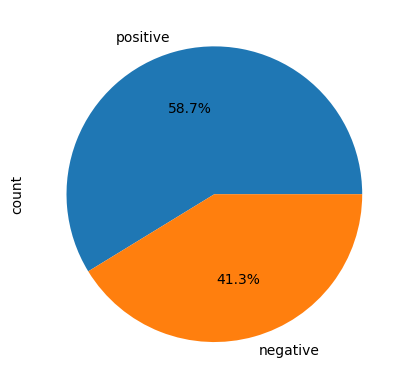

In [ ]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%0.1f%%')

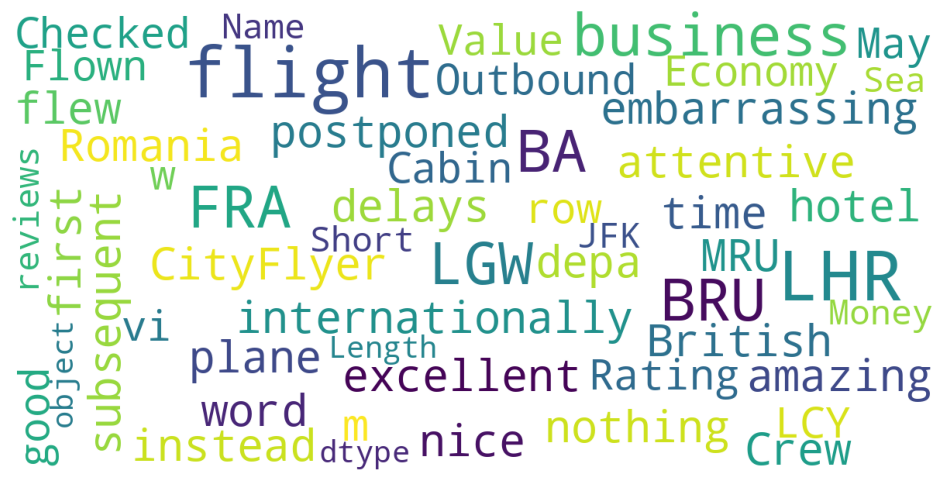

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews'])

Roberta

In [ ]:

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def polarity_scores_roberta(example):
    try:
      encoded_text = tokenizer(example, return_tensors='pt')
      output = model(**encoded_text)
      scores = output[0][0].detach().numpy()
      scores = softmax(scores)
      scores_dict = {
          'roberta_neg' : scores[0],
         'roberta_neu' : scores[1],
           'roberta_pos' : scores[2]
      }
      return sorted(scores_dict)[-1]
    except RuntimeError:
      print('size exceddedd')




df['roberta']=df['reviews'].apply(polarity_scores_roberta)

size exceddedd
size exceddedd
size exceddedd
size exceddedd
size exceddedd
size exceddedd
size exceddedd
size exceddedd
size exceddedd


IndexError: index out of range in self

In [ ]:
from transformers import BigBirdTokenizer, BigBirdForSequenceClassification
import torch
import pandas as pd
from scipy.special import softmax

# Load the pre-trained tokenizer and model
tokenizer = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')
model = BigBirdForSequenceClassification.from_pretrained('google/bigbird-roberta-base')

def polarity_scores_bigbird(example):
    try:
        # Tokenize the input text with truncation
        encoded_text = tokenizer(example, return_tensors='pt', max_length=4096, truncation=True)

        # Get model output
        output = model(**encoded_text)

        # Get logits and apply softmax
        scores = output.logits[0].detach().numpy()
        scores = softmax(scores)

        # Check the number of classes and create a dictionary of scores accordingly
        if len(scores) == 3:
            scores_dict = {
                'bigbird_neg': scores[0],
                'bigbird_neu': scores[1],
                'bigbird_pos': scores[2]
            }
        elif len(scores) == 2:
            scores_dict = {
                'bigbird_neg': scores[0],
                'bigbird_pos': scores[1]
            }
        else:
            raise ValueError("Unexpected number of classes")

        # Return the label with the highest score
        return max(scores_dict, key=scores_dict.get)
    except RuntimeError as e:
        print(f"RuntimeError: {e}")
        return "size exceeded"


# Apply the function to the dataframe
df['bigbird'] = df['reviews'].apply(polarity_scores_bigbird)

# Print the resulting dataframe
print(df.head())


Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at google/bigbird-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Attention type 'block_sparse' is not possible if sequence_length: 152 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * config.block_size = 704 with config.block_size = 64, config.num_random_blocks = 3. Changing attention type to 'original_full'...


                                             reviews  \
0   It is embarrassing to have the word British a...   
1   Flight cancelled due to bad weather BA contac...   
2   British Airways oversold my LHR to LAX flight...   
3   I travelled London to Doha on July th I had t...   
4   When dropping off my luggage at the luggage d...   

                                       reviews_words  \
0  [embarrass, word, british, attach, airlin, ser...   
1  [flight, cancel, due, bad, weather, ba, contac...   
2  [british, airway, oversold, lhr, lax, flight, ...   
3  [travel, london, doha, juli, th, physic, check...   
4  [drop, luggag, luggag, drop, toulous, airport,...   

                                                 pos      bigbird  
0  [(embarrass, NN), (word, NN), (british, JJ), (...  bigbird_neg  
1  [(flight, NN), (cancel, NN), (due, JJ), (bad, ...  bigbird_neg  
2  [(british, JJ), (airway, RB), (oversold, JJ), ...  bigbird_neg  
3  [(travel, NN), (london, NN), (doha, NN), (juli...  

In [ ]:
df['bigbird'].value_counts()

,count
bigbird,
bigbird_neg,3800
